In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

basedir = '/Users/clairealice/Documents/Research/Burchat/DonutNN/'

/Users/clairealice/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Loss function

In [8]:
code = 'dleknj'
NNtype = 'deconv'
layers = 7
iters = 5000
inputs = 1

directory = 'results/{}l_{}/1input/'.format(layers,NNtype)

name = NNtype + '_{}layer_{}nputs_0.001_{}ters_'.format(layers,inputs,iters) + code

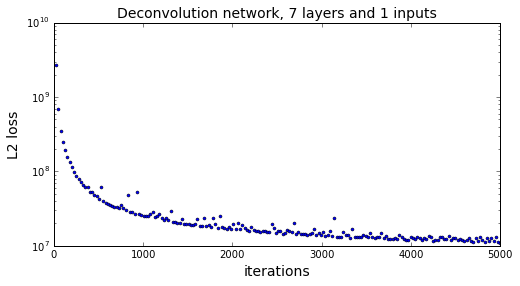

In [10]:
loss = np.loadtxt(basedir + directory + 'simulatedData_' + name +'.loss',skiprows=1)

pts = np.linspace(0,iters,len(loss))

fig = plt.figure(figsize=(8,4))
plt.semilogy(pts[1:],loss[1:],'bo',ms=3)
plt.title('Deconvolution network, {} layers and {} inputs'.format(layers,inputs),fontsize=14)
plt.xlabel('iterations',fontsize=14)
plt.ylabel('L2 loss',fontsize=14)

plt.savefig(basedir + directory + 'L2Loss_' + NNtype + '_' + name + '.png')
plt.show()

## Predictions

In [11]:
testdata = pd.read_pickle(basedir + directory + 'simulatedData_' + name + '_with_predictions.p')

td = testdata.sample(10,axis=0)

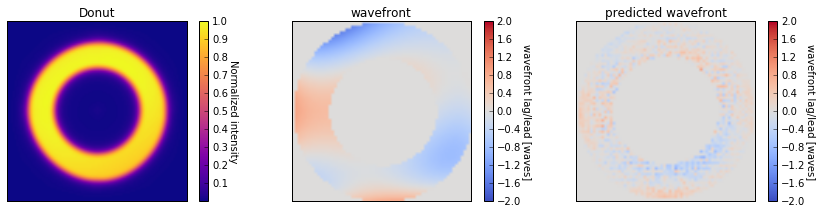

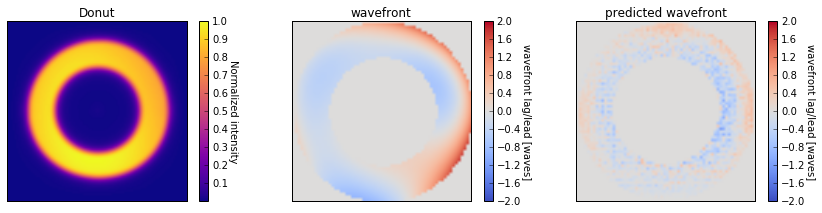

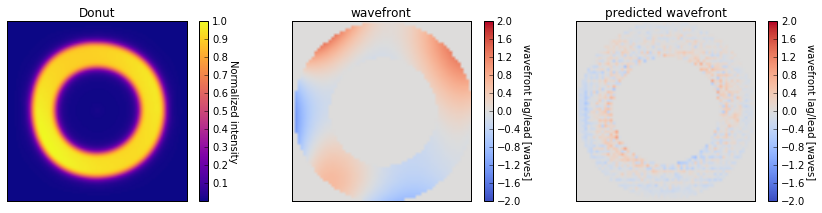

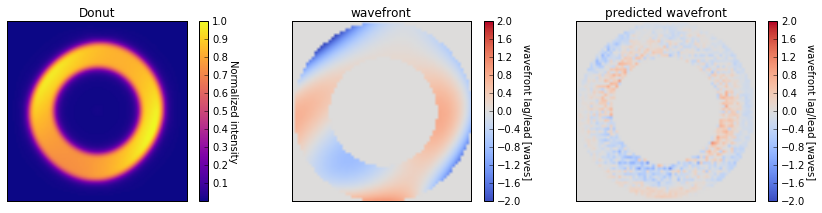

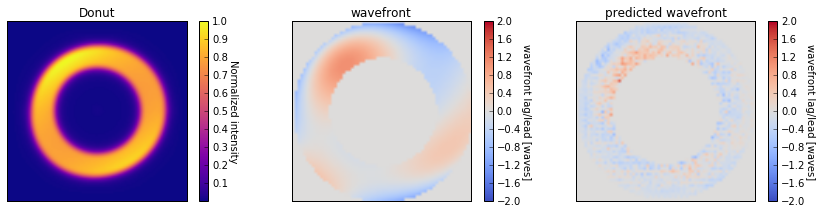

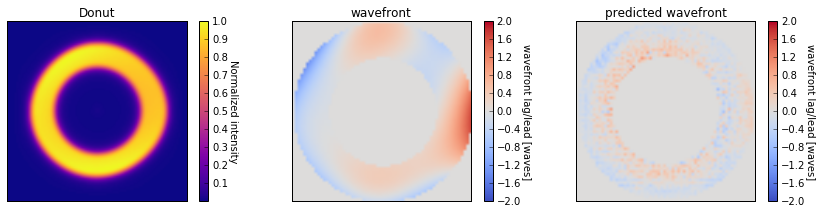

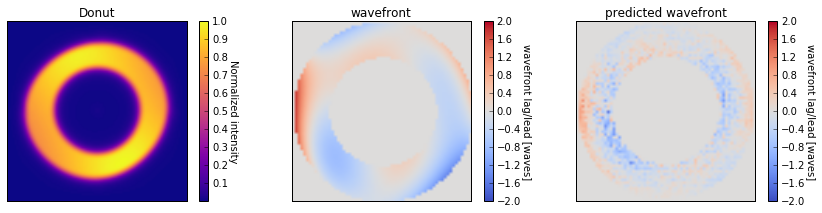

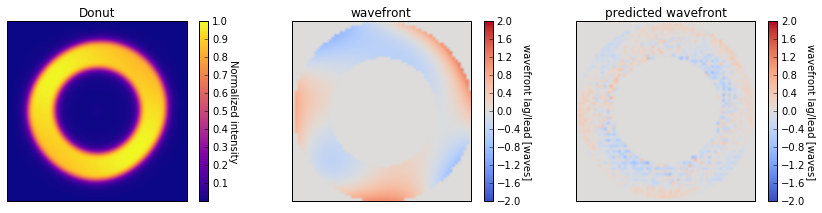

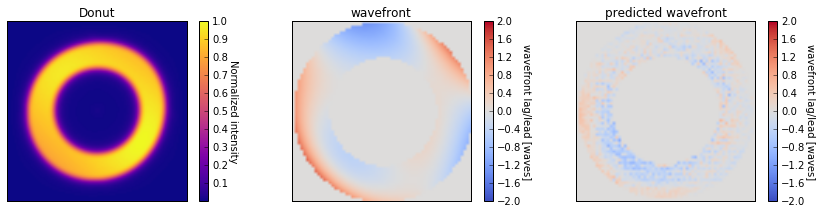

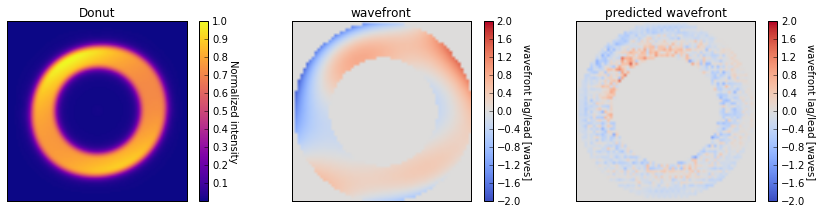

In [12]:
nx, ny = 64,64
x = np.linspace(-nx/2,nx/2,nx)
y = np.linspace(-nx/2,nx/2,nx)
X,Y = np.meshgrid(x,y)

R = np.hypot(X,Y)
annulus = ( (R<nx/2) & (R>nx*.3 ) ).astype(int)

for i in td.index.values:
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_title("Donut")
    imdonut = ax.imshow(testdata['psf'][i],cmap='plasma')
    cbar = fig.colorbar(imdonut)
    cbar.set_label('Normalized intensity', rotation=270,labelpad=10)
    ax.tick_params(axis='both',labelbottom='off',labelleft='off',bottom='off',right='off',top='off',left='off')
    
    ax = fig.add_subplot(1,3,2)
    ax.set_title("wavefront")
    imwf = ax.imshow(testdata['wavefront'][i],cmap='coolwarm',vmax=2,vmin=-2)
    cbar = fig.colorbar(imwf)
    cbar.set_label('wavefront lag/lead [waves]', rotation=270,labelpad=10)
    ax.tick_params(axis='both',labelbottom='off',labelleft='off',bottom='off',right='off',top='off',left='off')

    ax = fig.add_subplot(1,3,3)
    ax.set_title("predicted wavefront")
    imwf_p = ax.imshow(testdata['wavefront_pred'][i]*annulus,cmap='coolwarm',vmax=2,vmin=-2)
    cbar = fig.colorbar(imwf_p)
    cbar.set_label('wavefront lag/lead [waves]', rotation=270,labelpad=10)
    ax.tick_params(axis='both',labelbottom='off',labelleft='off',bottom='off',right='off',top='off',left='off')

    
    plt.tight_layout()
#     plt.savefig('figures/all_conv_result.png')
    plt.show()

## Nearest Neighbor prediction error

In [62]:
data = pd.read_pickle('/Users/clairealice/Documents/Research/Burchat/DonutNN/simulatedData.p')

test_nn = []
for test in testdata.index.values:
    distList = []
    for i in data.index.values:
        dist = np.sum(np.square(testdata['psf'][test]-data['psf'][i]))
        distList.append( (dist,i) )
    i_min = min(distList)
    _ = distList.pop(i_min[1])
    test_nn.append( min(distList) )

In [74]:
for (i,test) in enumerate(testdata.index.values):
    idx = np.array(test_nn)[i,1]
    diff = data['wavefront'][idx] - testdata['wavefront_pred'][test]*annulus
    err += np.sum(diff**2)
err = err/100
print err

679.637888271


## Model prediction error

In [13]:
nx, ny = 64,64
x = np.linspace(-nx/2,nx/2,nx)
y = np.linspace(-nx/2,nx/2,nx)
X,Y = np.meshgrid(x,y)
R = np.hypot(X,Y)
annulus = ( (R<nx/2) & (R>nx*.3 ) ).astype(int)

err = 0
for test in testdata.index.values:
    diff = testdata['wavefront'][test] - testdata['wavefront_pred'][test]*annulus
    err += np.sum(diff**2)
err = err/100
print err
print err/1972*100

390.9795416
19.8265487627
